### CHAPTER 7: VISUALIZATION

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

actors=pd.read_csv('/home/ashly/Desktop/FDS/Lab Assignments/Lab FDS 7-10-20/CSV Files/actors.csv')
actors.head()

,Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
0,Harrison Ford,4871.7,41,118.8,Star Wars: The Force Awakens,936.7
1,Samuel L. Jackson,4772.8,69,69.2,The Avengers,623.4
2,Morgan Freeman,4468.3,61,73.3,The Dark Knight,534.9
3,Tom Hanks,4340.8,44,98.7,Toy Story 3,415.0
4,"Robert Downey, Jr.",3947.3,53,74.5,The Avengers,623.4


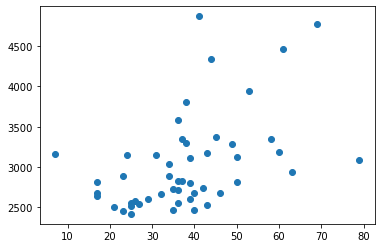

In [3]:
plt.scatter(actors['Number of Movies'],actors['Total Gross'])

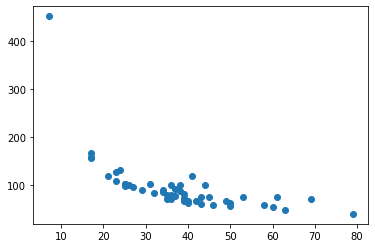

In [4]:
plt.scatter(actors['Number of Movies'],actors['Average per Movie'])

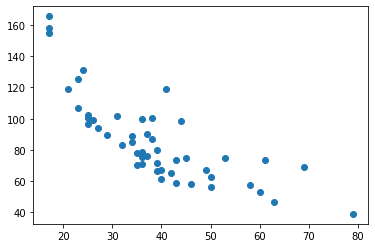

In [5]:
no_outlier=actors.loc[actors['Number of Movies']>10]
plt.scatter(no_outlier['Number of Movies'],no_outlier['Average per Movie'])

In [6]:
actors.loc[actors['Number of Movies']>60]

,Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
1,Samuel L. Jackson,4772.8,69,69.2,The Avengers,623.4
2,Morgan Freeman,4468.3,61,73.3,The Dark Knight,534.9
19,Robert DeNiro,3081.3,79,39.0,Meet the Fockers,279.3
21,Liam Neeson,2942.7,63,46.7,The Phantom Menace,474.5


In [7]:
actors.loc[actors['Number of Movies']<10]

,Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
14,Anthony Daniels,3162.9,7,451.8,Star Wars: The Force Awakens,936.7


#### Line Graphs

In [8]:
movies_by_year=pd.read_csv('/home/ashly/Desktop/FDS/Lab Assignments/Lab FDS 7-10-20/CSV Files/movies_by_year.csv')
movies_by_year.head()

,Year,Total Gross,Number of Movies,#1 Movie
0,2015,11128.5,702,Star Wars: The Force Awakens
1,2014,10360.8,702,American Sniper
2,2013,10923.6,688,Catching Fire
3,2012,10837.4,667,The Avengers
4,2011,10174.3,602,Harry Potter / Deathly Hallows (P2)


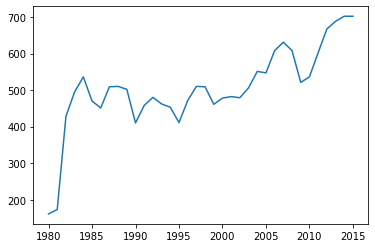

In [9]:
plt.plot(movies_by_year['Year'],movies_by_year['Number of Movies'])

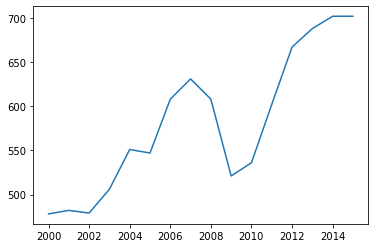

In [10]:
century_21=movies_by_year.loc[movies_by_year['Year']>1999]
plt.plot(century_21['Year'],century_21['Number of Movies'])


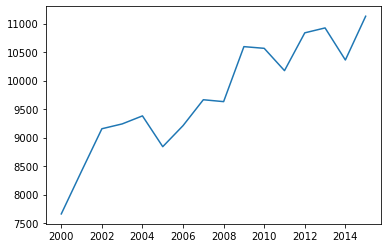

In [11]:
plt.plot(century_21['Year'],century_21['Total Gross'])

In [12]:
century_21.loc[century_21['Year']==2009]

,Year,Total Gross,Number of Movies,#1 Movie
6,2009,10595.5,521,Avatar


#### Visualizing Categorical Distributions 

In [13]:
icecream = pd.DataFrame({'Flavor':['Chocolate', 'Strawberry','Vanilla'],'Number of Cartons':[16, 5, 9]})
icecream

,Flavor,Number of Cartons
0,Chocolate,16
1,Strawberry,5
2,Vanilla,9


<BarContainer object of 3 artists>

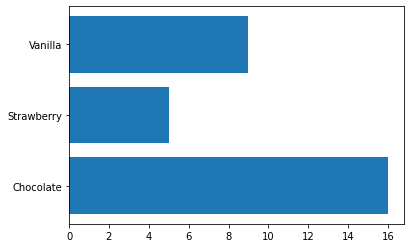

In [14]:
plt.barh(icecream.Flavor,icecream['Number of Cartons'])

<BarContainer object of 3 artists>

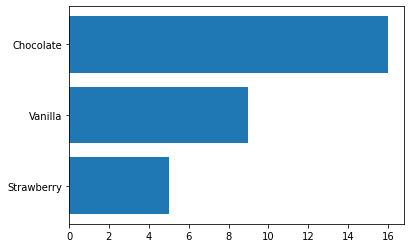

In [15]:
icecream=icecream.sort_values(by='Number of Cartons',ascending=True)
plt.barh(icecream['Flavor'],icecream['Number of Cartons'])

#### Grouping Categorical Data

In [73]:
top=pd.read_csv('/home/ashly/Desktop/FDS/Lab Assignments/Lab FDS 7-10-20/CSV Files/top_movies.csv')
top.head()

,Title,Studio,Gross,Gross (Adjusted),Year
0,Star Wars: The Force Awakens,Buena Vista (Disney),906723418,906723400,2015
1,Avatar,Fox,760507625,846120800,2009
2,Titanic,Paramount,658672302,1178627900,1997
3,Jurassic World,Universal,652270625,687728000,2015
4,Marvel's The Avengers,Buena Vista (Disney),623357910,668866600,2012


<AxesSubplot:ylabel='Studio'>

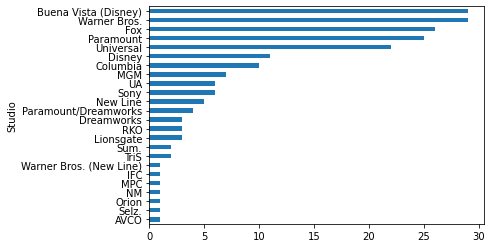

In [64]:
movies_and_studios = top.drop(columns=['Gross','Gross (Adjusted)','Year'])        
count=movies_and_studios.pivot_table(index=['Studio'], aggfunc='size')
#f, ax = plt.subplots(figsize=(18,18))
count=count.sort_values(ascending=True)
count.plot.barh()

<AxesSubplot:ylabel='Year'>

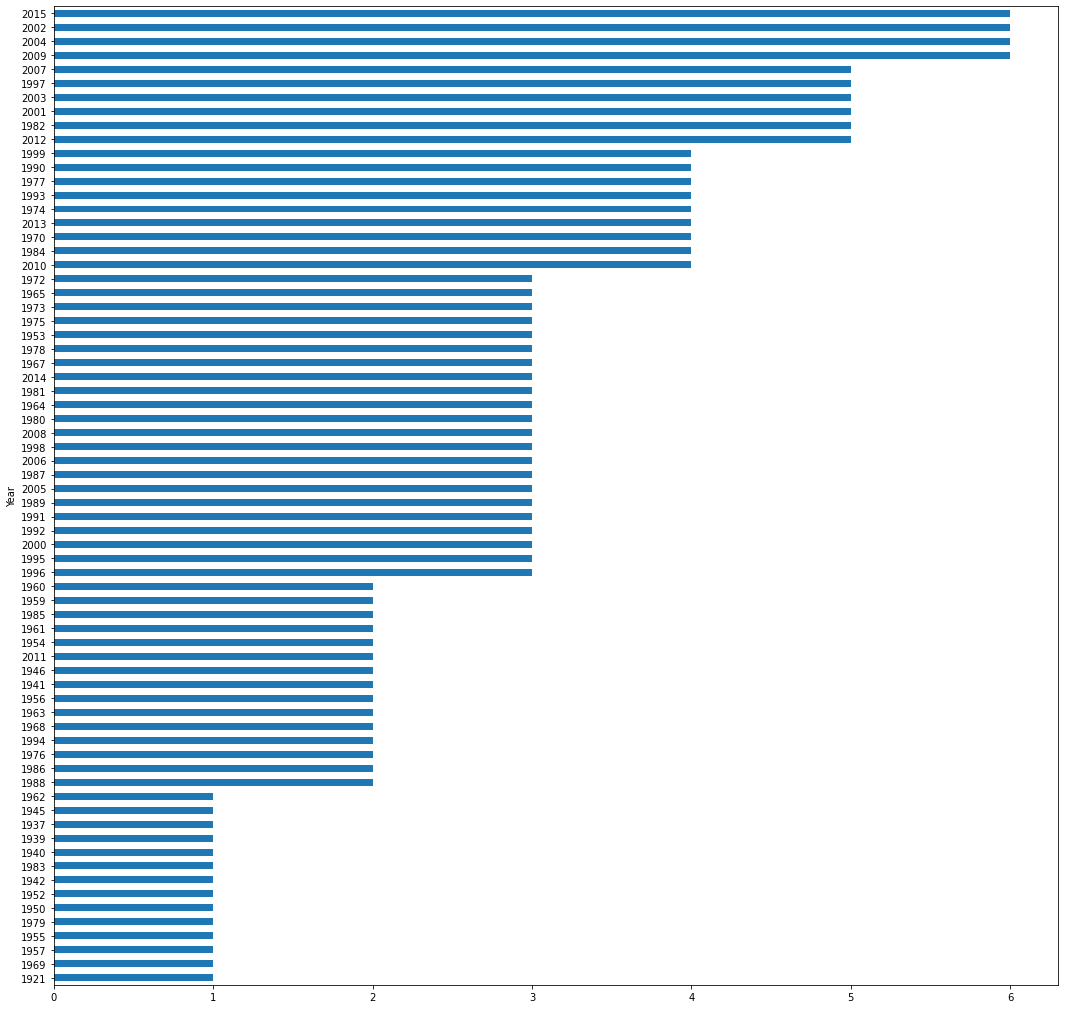

In [77]:
movies_and_studios1 = top.drop(columns=['Gross','Gross (Adjusted)','Studio'])  

count1=movies_and_studios1.pivot_table(index=['Year'], aggfunc='size')
f, ax = plt.subplots(figsize=(18,18))

count1=count1.sort_values(ascending=True)

count1.plot.barh()

<AxesSubplot:ylabel='Year'>

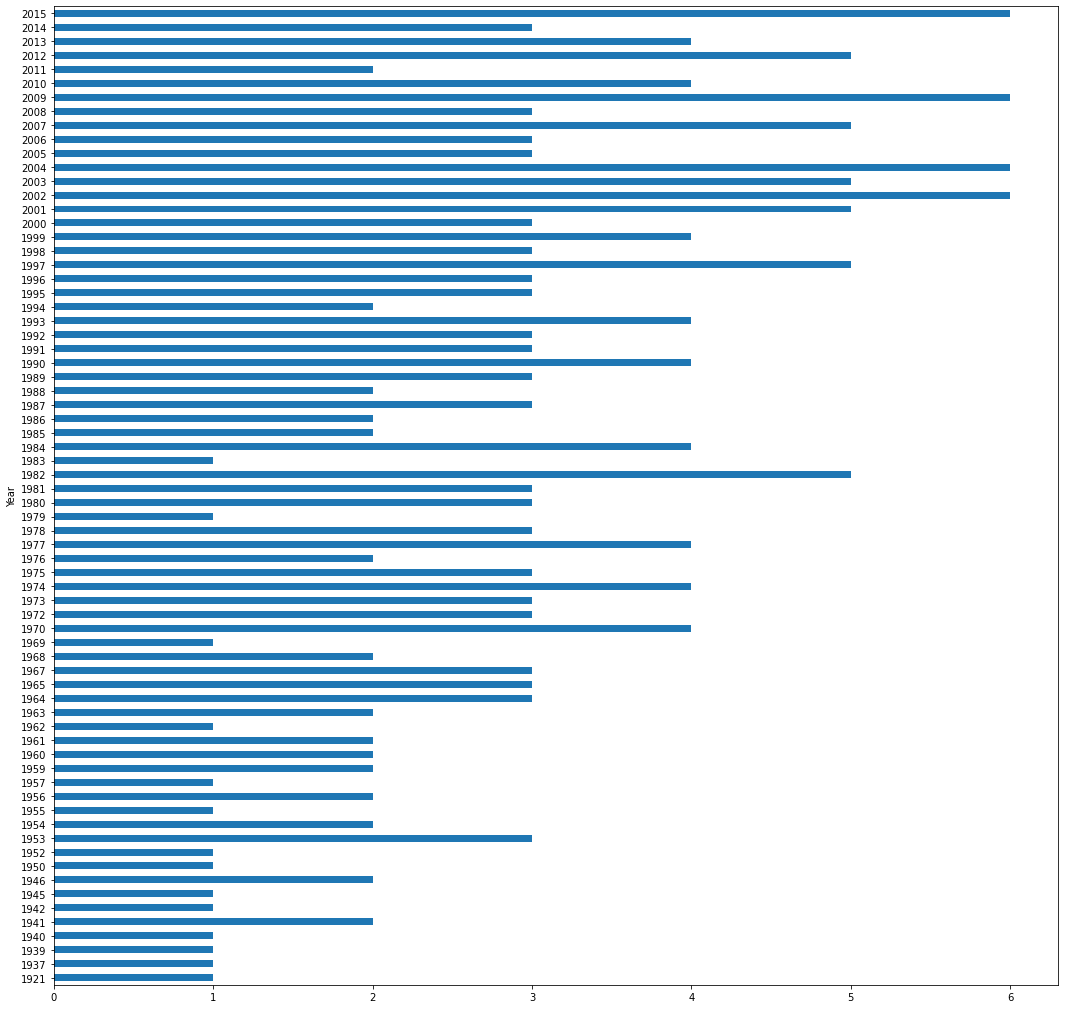

In [80]:
count1=movies_and_studios1.pivot_table(index=['Year'], aggfunc='size')
f, ax = plt.subplots(figsize=(18,18))
count1.plot.barh()

#### Visualizing Numerical Distributions 


In [214]:
top=pd.read_csv('/home/ashly/Desktop/FDS/Lab Assignments/Lab FDS 7-10-20/CSV Files/top_movies.csv')
top.head()



,Title,Studio,Gross,Gross (Adjusted),Year
0,Star Wars: The Force Awakens,Buena Vista (Disney),906723418,906723400,2015
1,Avatar,Fox,760507625,846120800,2009
2,Titanic,Paramount,658672302,1178627900,1997
3,Jurassic World,Universal,652270625,687728000,2015
4,Marvel's The Avengers,Buena Vista (Disney),623357910,668866600,2012


In [215]:
millions=top.drop(columns=['Studio','Gross','Year'])
millions.rename(columns={'Gross (Adjusted)':'Adjust'},inplace=True)
millions.Adjust=np.round(millions.Adjust/10**6,2)
millions.head()





,Title,Adjust
0,Star Wars: The Force Awakens,906.72
1,Avatar,846.12
2,Titanic,1178.63
3,Jurassic World,687.73
4,Marvel's The Avengers,668.87


Text(0, 0.5, 'Percent per Million Dollars')

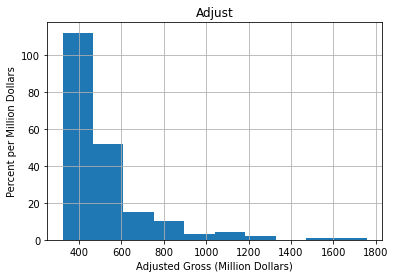

In [166]:
millions.hist('Adjust')
plt.xlabel("Adjusted Gross (Million Dollars)")
plt.ylabel("Percent per Million Dollars")

Text(0, 0.5, 'Percent per Million Dollars')

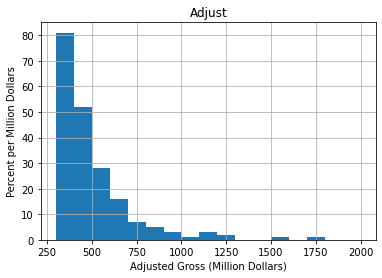

In [167]:
millions.hist('Adjust',bins=np.arange(300,2001,100))
plt.xlabel("Adjusted Gross (Million Dollars)")
plt.ylabel("Percent per Million Dollars")

In [206]:
t=millions['Adjust'].value_counts(bins=np.arange(300,2001,100))
t

(299.999, 400.0]    81
(400.0, 500.0]      52
(500.0, 600.0]      28
(600.0, 700.0]      16
(700.0, 800.0]       7
(800.0, 900.0]       5
(900.0, 1000.0]      3
(1100.0, 1200.0]     3
(1200.0, 1300.0]     2
(1000.0, 1100.0]     1
(1500.0, 1600.0]     1
(1700.0, 1800.0]     1
(1800.0, 1900.0]     0
(1300.0, 1400.0]     0
(1400.0, 1500.0]     0
(1600.0, 1700.0]     0
(1900.0, 2000.0]     0
Name: Adjust, dtype: int64

In [207]:
t=pd.DataFrame(t)
t['Percent']=(t.Adjust/200)*100
t['Height']=t.Percent/100
keys=np.arange(300,2000,100)
t.set_index(keys,inplace=True)
t

,Adjust,Percent,Height
300,81,40.5,0.405
400,52,26.0,0.260
500,28,14.0,0.140
600,16,8.0,0.080
700,7,3.5,0.035
800,5,2.5,0.025
900,3,1.5,0.015
1000,3,1.5,0.015
1100,2,1.0,0.010
1200,1,0.5,0.005


(array([0.00409091, 0.0020202 , 0.00020763]),
 array([ 300,  400,  600, 1500]),
 <BarContainer object of 3 artists>)

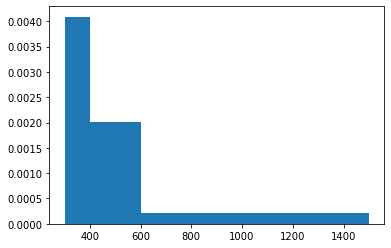

In [222]:
#I used plt.hist() here
uneven = [300, 400, 600, 1500]
plt.hist(millions.Adjust,bins=uneven,density=True)

In [171]:
t_uneven=millions['Adjust'].value_counts(bins=uneven)
t_uneven

(299.999, 400.0]    81
(400.0, 600.0]      80
(600.0, 1500.0]     37
Name: Adjust, dtype: int64

#### The Problem with Simply Plotting Counts 


Text(0, 0.5, 'Percent per Million Dollars')

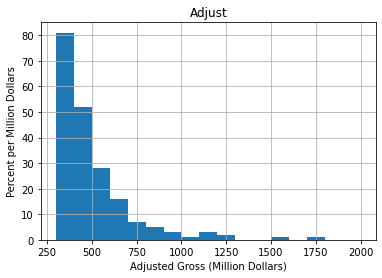

In [172]:
millions.hist('Adjust',bins=np.arange(300,2001,100))
plt.xlabel("Adjusted Gross (Million Dollars)")
plt.ylabel("Percent per Million Dollars")

array([[<AxesSubplot:title={'center':'Adjust'}>]], dtype=object)

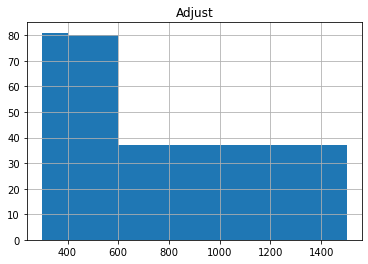

In [225]:
#Here i used the Pandas hist, which is not normalized
uneven = [300, 400, 600, 1500]
millions.hist('Adjust',bins=uneven)

array([[<AxesSubplot:title={'center':'Adjust'}>]], dtype=object)

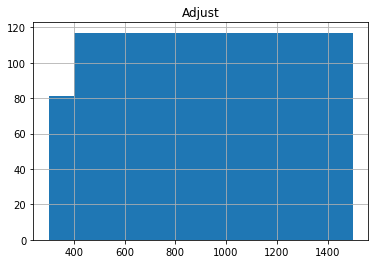

In [210]:
very_uneven = [300, 400, 1500]
millions.hist('Adjust',bins=very_uneven)

#### Flat Tops and the Level of Detail 

(array([0.00409091, 0.0020202 , 0.00020763]),
 array([ 300,  400,  600, 1500]),
 <BarContainer object of 3 artists>)

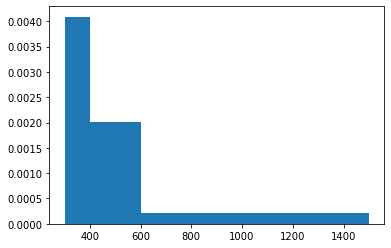

In [226]:
uneven = [300, 400, 600, 1500]
plt.hist(millions.Adjust,bins=uneven,density=True)

(array([0.        , 0.        , 0.00606061, 0.0030303 , 0.00707071,
        0.00505051, 0.00606061, 0.00454545, 0.0040404 , 0.00505051,
        0.0020202 , 0.00020763]),
 array([ 300,  310,  320,  330,  340,  350,  360,  370,  380,  390,  400,
         600, 1500]),
 <BarContainer object of 12 artists>)

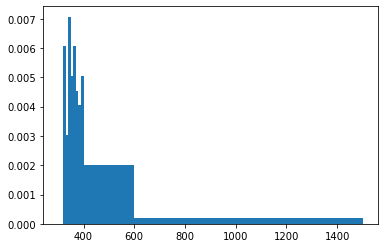

In [227]:
some_tiny_bins = [300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 600, 1500]
plt.hist(millions.Adjust,bins=some_tiny_bins,density=True)


(array([0.00323232, 0.00494949, 0.00252525, 0.00044252]),
 array([ 300,  350,  400,  450, 1500]),
 <BarContainer object of 4 artists>)

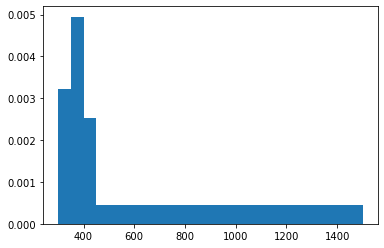

In [229]:
uneven_again = [300, 350, 400, 450, 1500]
plt.hist(millions.Adjust,bins=uneven_again,density=True)